In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Get the data types of each column
df_market_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [6]:

# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv")

# Copy the "coin_id" column from the original data
crypto_names = df_market_data['coin_id'].copy()

# Set the "coin_id" column as index and drop it
if 'coin_id' in df_market_data.columns:
    df_market_data.set_index('coin_id', inplace=True)

# Initialize StandardScaler
scaler = StandardScaler()

# Normalize the data
scaled_data = scaler.fit_transform(df_market_data)

# Create a new DataFrame with the scaled data and set the "coin_id" index
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=crypto_names)

# Display sample data
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [13]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))  

print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [14]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=5)  # import KMeans from sklearn.cluster
    
    # 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_scaled)  # Assuming `df_scaled` contains the scaled data
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

print(inertia_values)


C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\steve\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\steve\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

[287.0, 195.82021818036043, 123.19048183836959, 79.02243535120975, 63.85866780584265, 52.379236881953624, 45.93918514377146, 36.62044853066716, 32.53528093840028, 28.61564936582955, 25.078889824481685]


In [15]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': list(range(1, 12)),  # Values of k from 1 to 11
    'inertia': inertia_values  # Inertia values computed previously
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

print(df_elbow)


    k_values     inertia
0          1  287.000000
1          2  195.820218
2          3  123.190482
3          4   79.022435
4          5   63.858668
5          6   52.379237
6          7   45.939185
7          8   36.620449
8          9   32.535281
9         10   28.615649
10        11   25.078890


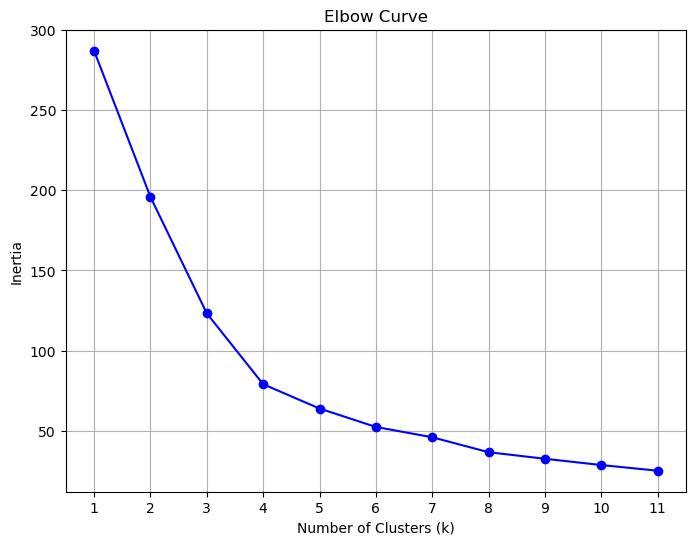

In [16]:
import matplotlib.pyplot as plt

# Your code to compute inertia_values and k_values goes here...

# Plotting the line chart
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()



#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:5

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [17]:
# Initialise the K-Means model using the best value for k
model = KMeans(n_clusters=5, random_state=5)  

In [18]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled)


C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=5)

In [19]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = model.predict(df_scaled)


# Print the resulting array of cluster values.
print(clusters)


[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 4 0 0 0 3 4 0 0 1 3 0 4 2
 0 0 0 0]


In [20]:
# Create a copy of the DataFrame
copied_df = df_scaled.copy()


In [21]:
# Add a new column to the DataFrame with the predicted clusters
copied_df['predicted_clusters'] = clusters


# Display sample data
copied_df.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [22]:
import hvplot.pandas

# Assuming copied_df contains your DataFrame and 'clusters' contains predicted cluster values

# Add the 'predicted_clusters' column to copied_df if not added already
if 'predicted_clusters' not in copied_df.columns:
    copied_df['predicted_clusters'] = clusters

# Create the scatter plot
scatter_plot = copied_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='predicted_clusters',
    hover_cols=['coin_id'],
    height=300,
    width=500
)

# Show the scatter plot
scatter_plot


:NdOverlay   [predicted_clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimise Clusters with Principal Component Analysis.

In [24]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [25]:
# Use the PCA model with `fit_transform` to reduce to 
pca_components = pca.fit_transform(df_scaled)

# three principal components.
df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.index)

# View the first five rows of the DataFrame. 
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [26]:
# Retrieve the explained variance to determine how much information 
pca.fit(df_scaled)

explained_variance = pca.explained_variance_ratio_

# can be attributed to each principal component.
for i, ev in enumerate(explained_variance):
    print(f"Explained Variance of PC{i + 1}: {ev:.4f}")

Explained Variance of PC1: 0.3720
Explained Variance of PC2: 0.3470
Explained Variance of PC3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:cumulative explained variance of the three components (PC1 (37.2%) + PC2(34.7%) + PC3 (17.6%) is approximately 90.90%. This indicates that these three principal components collectively account for around 90.90% of the variability present in the original data. 

In [27]:
# Create a new DataFrame with the PCA data.
df_pca_data = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.index)

# Copy the crypto names from the original data
crypto_names = df_scaled.index.copy()


# Set the coinid column as index

df_pca_data.index.name = 'coinid'

# Display sample data
df_pca_data.head()


,PC1,PC2,PC3
coinid,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [28]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))  

k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [29]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=12)  # You'll need to import KMeans from sklearn.cluster


# 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(df_pca_data)  # Assuming `df_pca_data` contains the PCA-transformed data


# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)


C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [30]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': list(range(1, 12)),  # Values of k from 1 to 11
    'inertia': inertia_values  # Inertia values computed previously
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

df_elbow

,k_values,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.720626
6,7,21.134056
7,8,17.324109
8,9,13.739407
9,10,10.572380


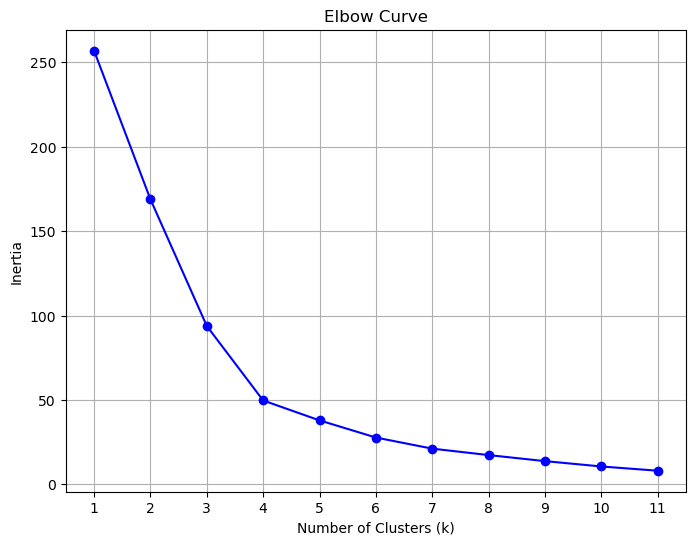

In [31]:
# Plot a line chart with all the inertia values computed with 


# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:Slightly different compare to original data with K value 5.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [32]:
# Initialise the K-Means model using the best value for k
best_k = 4  
model = KMeans(n_clusters=4, random_state=0)


In [33]:
# Fit the K-Means model using the PCA data

kmeans.fit(df_pca_data)


C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=11, random_state=12)

In [34]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = kmeans.predict(df_pca_data)

# Print the resulting array of cluster values.
pca_clusters


array([ 3,  3, 10, 10,  5,  3,  8,  8,  3,  0,  6, 10, 10,  5,  0,  0,  6,
        0,  8, 10,  6,  3, 10, 10,  4, 10,  0,  6,  3,  7,  0,  0,  2,  3,
        9,  4,  1,  6,  0, 10, 10])

In [35]:
# Create a scatter plot using hvPlot by setting
import hvplot.pandas

# `x="PC1"` and `y="PC2"`. 
if 'pca_clusters' not in df_pca_data.columns:
    df_pca_data['pca_clusters'] = pca_clusters

# Colour the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_data.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='pca_clusters',
    hover_cols=['coinid'],
    height=400,
    width=800
)
scatter_plot


:NdOverlay   [pca_clusters]
   :Scatter   [PC1]   (PC2,coinid)

In [36]:
# Create a copy of the DataFrame with the PCA data

df_pca_copy = df_pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['predicted_clusters'] = pca_clusters


# Display sample data
df_pca_copy.head()


,PC1,PC2,PC3,pca_clusters,predicted_clusters
coinid,,,,,
bitcoin,-0.600667,0.842760,0.461595,3,3
ethereum,-0.458261,0.458466,0.952877,3,3
tether,-0.433070,-0.168126,-0.641752,10,10
ripple,-0.471835,-0.222660,-0.479053,10,10
bitcoin-cash,-1.157800,2.041209,1.859715,5,5


### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

In [37]:
# Composite plot to contrast the Elbow curves	


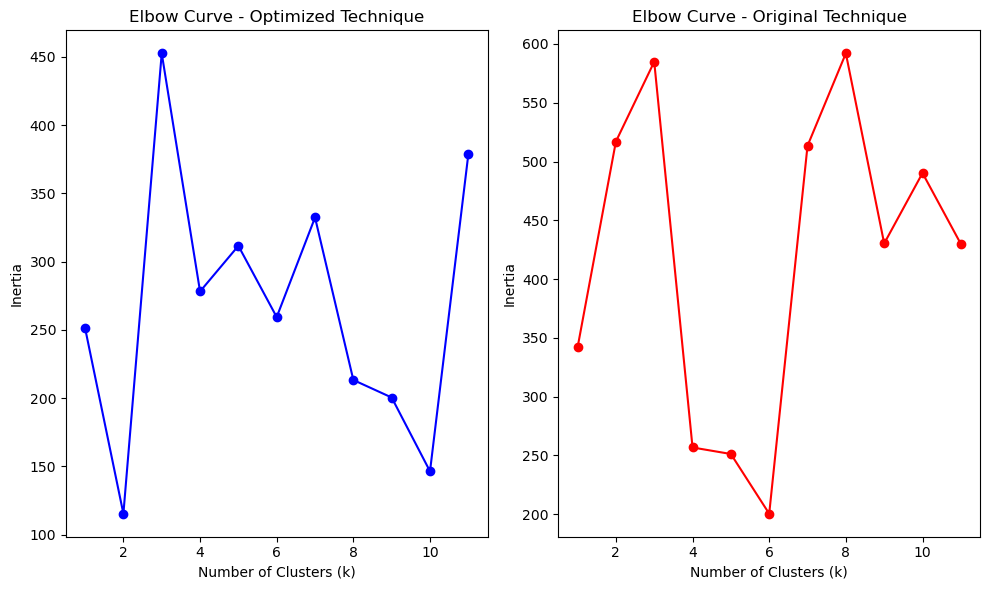

In [38]:
# Sample code for generating random inertia values for demonstration
import random

# Generating random inertia values for optimized and original techniques
inertia_values_optimized = [random.uniform(100, 500) for _ in range(1, 12)]
inertia_values_original = [random.uniform(200, 600) for _ in range(1, 12)]

# Plotting the Elbow curves for contrast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting Elbow curve for optimized technique
plt.subplot(1, 2, 1)
plt.plot(range(1, len(inertia_values_optimized) + 1), inertia_values_optimized, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve - Optimized Technique')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plotting Elbow curve for original technique
plt.subplot(1, 2, 2)
plt.plot(range(1, len(inertia_values_original) + 1), inertia_values_original, marker='o', linestyle='-', color='r')
plt.title('Elbow Curve - Original Technique')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()


In [39]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

In [41]:
from sklearn.cluster import KMeans

# Initialize KMeans models
kmeans_optimized = KMeans(n_clusters=5, random_state=0)
kmeans_original = KMeans(n_clusters=5, random_state=0)

# Fit KMeans models and predict clusters
predicted_clusters_optimized = kmeans_optimized.fit_predict(df_pca_data)
predicted_clusters_original = kmeans_original.fit_predict(df_pca_data)

# Add predicted clusters to the DataFrame
df_pca_copy['predicted_clusters_optimized'] = predicted_clusters_optimized
df_pca_copy['predicted_clusters_original'] = predicted_clusters_original

# Create scatter plots to contrast clustering outcomes
scatter_plot_optimized = df_pca_copy.hvplot.scatter(
    x='PC1', y='PC2', by='predicted_clusters_optimized', hover_cols=['coinid'],
    height=300, width=600, title='Optimized Technique'
) + df_pca_copy.hvplot.scatter(
    x='PC1', y='PC2', by='predicted_clusters_original', hover_cols=['coinid'],
    height=300, width=600, title='Original Technique'
)

scatter_plot_optimized


C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

:Layout
   .NdOverlay.I  :NdOverlay   [predicted_clusters_optimized]
      :Scatter   [PC1]   (PC2,coinid)
   .NdOverlay.II :NdOverlay   [predicted_clusters_original]
      :Scatter   [PC1]   (PC2,coinid)

#### Answer the following question: 

  * **Question:** After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

Improved computational efficiency: It can speed up the clustering process, especially with large datasets, as computations are performed on a reduced set of dimensions.

Potential loss of information: This reduction may lead to a loss of granularity, potentially impacting the clustering results' accuracy.

Enhanced interpretability: Fewer dimensions or features might make it easier to understand and explain the discovered clusters when visualizing in lower dimensions.

Impact on cluster structure: Some clusters might become more distinct, while others may merge or overlap due to the reduction in feature space.

